H0 = 'Выборки X и Y не коррелируют (нет зависимости, p_s == 0)'
x = array([ 87, 135,  65,  80, 112,  77,  93,  91,  55,  58,  63,  90,  76,
       105,  34]), 
y = array([10, 40, 43, 22,  9, 15, 34, 21, 32, 80, 27, 12, 26, 14, 41])
Размеры выборок одинаковы - True, n = 15
x_mean = 81.4 

y_mean = 28.4


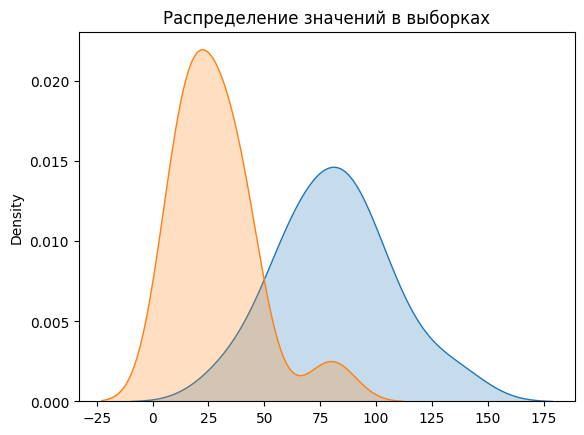

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sps
import statsmodels.api as sm

'''
Задача про зависимость между мощностью голоса 
и арсеналом тяжелых предметов на кухне у лондонских домохозяек 
'''
import seaborn as sns

x = np.array([87, 135, 65, 80, 112, 77, 93, 91, 55, 58, 63, 90, 76, 105, 34])
y = np.array([10, 40, 43, 22, 9, 15, 34, 21, 32, 80, 27, 12, 26, 14, 41])

n = len(x)

H0 = 'Выборки X и Y не коррелируют (нет зависимости, p_s == 0)'
print(f'{H0 = }')
print(f'{x = }, \n{y = }')
print(f'Размеры выборок одинаковы - {len(x) == len(y)}, {n = }')

for i in [x, y]:
    subset = i
    sns.kdeplot(subset, fill=True)
plt.title('Распределение значений в выборках')

x_mean = x.mean()
y_mean = y.mean()
print(f'{x_mean = } \n\n{y_mean = }')

In [2]:
# Коэффициент корреляции Спирмена

x_rank = sps.rankdata(x)
y_rank = sps.rankdata(y)

p_s1 = ((x_rank - x_rank.mean()) * (y_rank - y_rank.mean())).sum() / (sum((x_rank - x_rank.mean())**2) * sum((y_rank - y_rank.mean())**2))**0.5

p_s2 = 1 - ((6/(len(x)**3 - len(x))) * sum((x_rank - y_rank)**2))

print(p_s1)
print(p_s2)

-0.5178571428571429
-0.5178571428571428


In [3]:
"""
Значимость коэффициента проверяется на основе t-критерия Стьюдента по формуле. 
При проверке этой гипотезы вычисляется t - статистика.
Расчетное значение сравнивается с табличным значением t_q для (n-2).
"""

t_Stud_01 = 1.771

t_raschet = ((p_s1**2) * (n - 2) / (1 - p_s1**2))**0.5
if p_s1 == 0:
    print(f'{H0}')
elif p_s1 < 0:
    print("Отвергаем H0. Между выборками обратная зависимость.")
else:
    print("Отвергаем H0. Между выборками прямая зависимость.")
if t_raschet > t_Stud_01:
    print("Расчетное значение больше табличного, это свидетельствует о значимости коэффициента корреляции и о статистической существенности зависимости между выборочными данными")
else:
    print("Расчетное значение меньше табличного, это свидетельствует о незначимости коэффициента корреляции и о статистической несущественности зависимости между выборочными данными")


Отвергаем H0. Между выборками обратная зависимость.
Расчетное значение больше табличного, это свидетельствует о значимости коэффициента корреляции и о статистической существенности зависимости между выборочными данными


In [4]:
# Проверим дополнительно 
if sps.spearmanr(x, y)[0] != 0:
    print(f'Отвергаем H_0.')
    if sps.spearmanr(x, y)[0] < 0:
        print(f'Между выборками обратная зависимость')
    else:
        print(f'Между выборками прямая зависимость')
else:
    print(f'Принимаем H_0')
if sps.spearmanr(x, y)[1] <= 0.1:
    print(f'Результат статистически значимый')
else:
    print(f'Результат статистически значимый')


Отвергаем H_0.
Между выборками обратная зависимость
Результат статистически значимый


Таким образом, между мощностью голоса и арсеналом тяжелых предметов на кухне у лондонских домохозяек есть обратная зависимость со статистически значимым коэффициентом корреляции на уровне значимости 0.1.

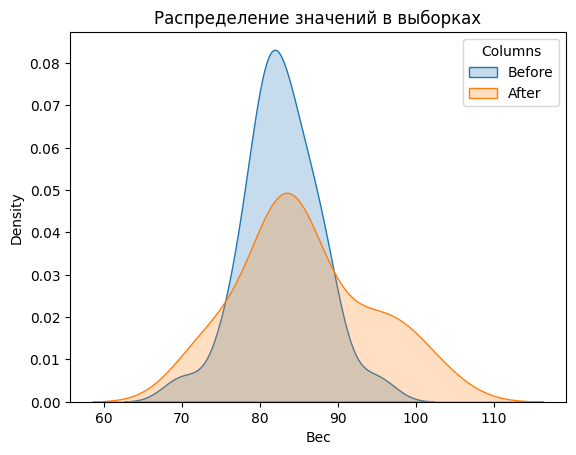

In [5]:
'''
Задача про поведенческую терапию и лечение анорексии.
Проверить, была ли терапия эффективной, на уровне значимости 0.05.
'''
# H_0 - выборки независимы, связи нет 

df = pd.read_csv('/home/user404/Projects/Python/PyMagic/weight.txt', sep='\t')

for col in df.columns:
    subset = df.loc[: , col]
    sns.kdeplot(subset, label=col, fill=True)

plt.legend(prop={'size': 10}, title = 'Columns')
plt.title('Распределение значений в выборках')
plt.xlabel('Вес');

In [6]:
# Проверим дополнительно 
if sps.spearmanr(df.Before, df.After)[0] != 0:
    print(f'Отвергаем H_0.')
    if sps.spearmanr(df.Before, df.After)[0] < 0:
        print(f'Между выборками обратная зависимость.')
    else:
        print(f'Между выборками прямая зависимость.')
else:
    print(f'Принимаем H_0')
if sps.spearmanr(df.Before, df.After)[1] <= 0.05:
    print(f'Результат статистически значимый.')
else:
    print(f'Результат статистически значимый.')


Отвергаем H_0.
Между выборками прямая зависимость.
Результат статистически значимый.
